Epoch 1/200
32/32 - 0s - 8ms/step - loss: 3.7673
Epoch 2/200
32/32 - 0s - 3ms/step - loss: 2.0436
Epoch 3/200
32/32 - 0s - 3ms/step - loss: 1.4677
Epoch 4/200
32/32 - 0s - 3ms/step - loss: 1.2193
Epoch 5/200
32/32 - 0s - 3ms/step - loss: 1.0950
Epoch 6/200
32/32 - 0s - 3ms/step - loss: 1.0254
Epoch 7/200
32/32 - 0s - 2ms/step - loss: 0.9822
Epoch 8/200
32/32 - 0s - 3ms/step - loss: 0.9526
Epoch 9/200
32/32 - 0s - 3ms/step - loss: 0.9306
Epoch 10/200
32/32 - 0s - 3ms/step - loss: 0.9131
Epoch 11/200
32/32 - 0s - 3ms/step - loss: 0.8986
Epoch 12/200
32/32 - 0s - 3ms/step - loss: 0.8860
Epoch 13/200
32/32 - 0s - 3ms/step - loss: 0.8751
Epoch 14/200
32/32 - 0s - 3ms/step - loss: 0.8653
Epoch 15/200
32/32 - 0s - 3ms/step - loss: 0.8565
Epoch 16/200
32/32 - 0s - 3ms/step - loss: 0.8485
Epoch 17/200
32/32 - 0s - 3ms/step - loss: 0.8412
Epoch 18/200
32/32 - 0s - 3ms/step - loss: 0.8347
Epoch 19/200
32/32 - 0s - 3ms/step - loss: 0.8287
Epoch 20/200
32/32 - 0s - 3ms/step - loss: 0.8232
Epoch 21/

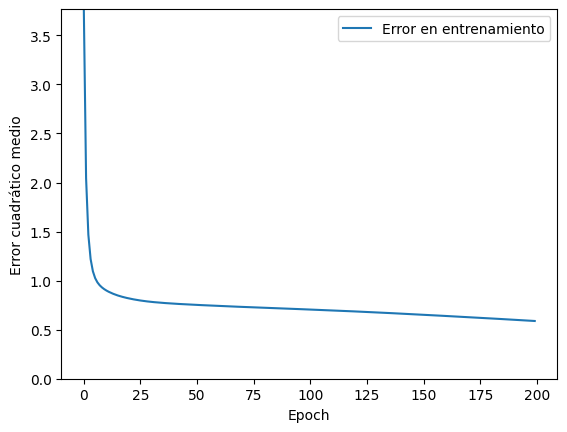

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Comparación entre predicción del modelo y valor real:
 x1	 x2	 predicción	 valor_real	 error
 0.00	 0.00	    0.4406	    1.0000	    0.5594
 1.00	 1.00	    0.2014	    1.3818	    1.1804
-2.00	 3.00	   -0.2026	   -0.2750	    0.0724
 3.00	-1.00	   -0.5427	   -1.8315	    1.2887
 4.00	 4.00	   -1.1470	   -1.4104	    0.2634


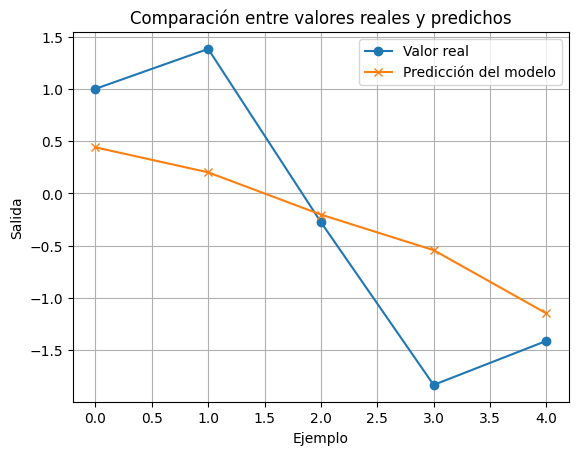

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Fijar semillas para reproducibilidad
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Generar datos sintéticos
n_samples = 5000
x1 = np.random.uniform(-5, 5, n_samples)
x2 = np.random.uniform(-5, 5, n_samples)
y = np.cos(x1) + np.sin(x2)

# Combinar x1 y x2 en una matriz de características X
X = np.column_stack((x1, x2))

# Definir el modelo
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu', name="hidden1_layer"))
model.add(Dense(1, name="output_layer"))

# Compilar el modelo
learning_rate = 0.001
sgd = SGD(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=sgd)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Entrenar el modelo
batch_size = 128
epochs = 200
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba: {test_loss:.4f}")

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Error cuadrático medio')
    plt.plot(history.epoch, history.history['loss'], label='Error en entrenamiento')
    plt.legend()
    plt.ylim([0, max(1, max(history.history['loss']))])
    plt.show()
plot_history(history)

# Predicción y comparación ---

# Algunos valores de ejemplo
X_pred = np.array([
    [0, 0],
    [1, 1],
    [-2, 3],
    [3, -1],
    [4, 4]
])

# Predicciones del modelo
y_pred = model.predict(X_pred)

# Resultados reales según la función original
y_true = np.cos(X_pred[:, 0]) + np.sin(X_pred[:, 1])

# Mostrar comparación
print("\nComparación entre predicción del modelo y valor real:")
print(" x1\t x2\t predicción\t valor_real\t error")
for (x1_val, x2_val, yp, yt) in zip(X_pred[:, 0], X_pred[:, 1], y_pred.flatten(), y_true):
    print(f"{x1_val:5.2f}\t{x2_val:5.2f}\t{yp:10.4f}\t{yt:10.4f}\t{abs(yp - yt):10.4f}")

# Visualización de comparación
plt.figure()
plt.plot(y_true, label='Valor real', marker='o')
plt.plot(y_pred, label='Predicción del modelo', marker='x')
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Ejemplo')
plt.ylabel('Salida')
plt.legend()
plt.grid(True)
plt.show()